In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

### Low Duration Outage

In [1]:
month = [12*i+8 for i in range(168)]
com = 2
com_folder = {1: 'HarrisCounty-SS',
              2: 'TravisCounty-DS',
              3: 'TravisCounty-RW'}


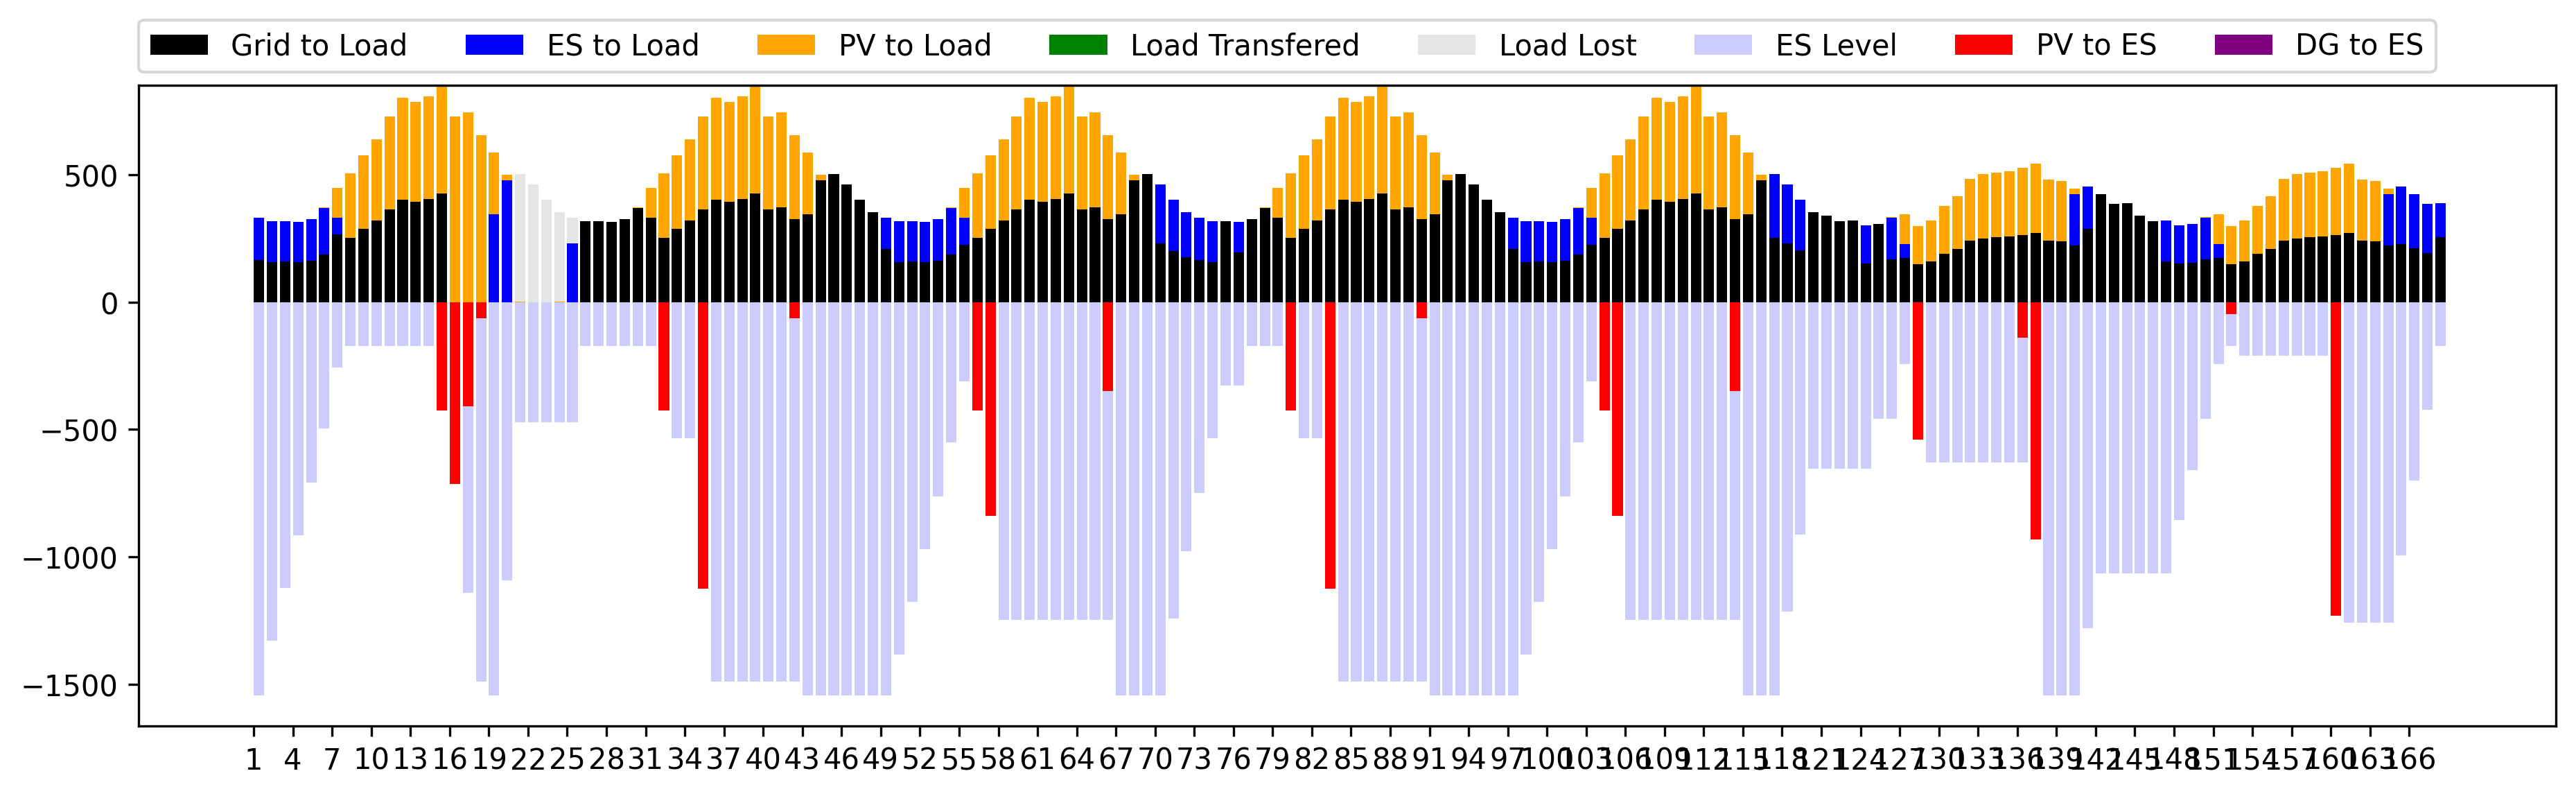

In [56]:
with open(f'{com_folder[com]} Low_Outage.pkl', 'rb') as handle:
    ESL, PVL, PVES, DGES, DGL, LT, LL, E, GL, GES = pickle.load(handle)
handle.close()
itg = [(1, t, 8) for t in range(1, 169)]
itg_1 = [(1, t, 8) for t in range(1, 168)]
LT = {(1, t, 8): sum([LT[(1, t, to, 8)] for to in range(t+1, 169)]) for t in range(1, 168)}
rng = range(1, 169)


figure1 = plt.figure(figsize=(15, 4), dpi=300)
plt.bar(rng, [GL[i] for i in itg],
        color='black', align='edge', label='Grid to Load')

plt.bar(rng, [ESL[i] for i in itg],
        bottom=[GL[i] for i in itg], color='blue', align='edge', label='ES to Load')

plt.bar(rng, [PVL[i] for i in itg],
        bottom=np.array([ESL[i] for i in itg])+np.array([GL[i] for i in itg]),
        color='orange', align='edge', label='PV to Load')

plt.bar(rng, [LT[i] for i in itg_1]+[0],
        bottom=np.array([ESL[i] for i in itg])+np.array([PVL[i] for i in itg])+np.array([GL[i] for i in itg]),
        color='green', align='edge', label='Load Transfered')

plt.bar(rng, [LL[i] for i in itg],
        bottom=np.array([ESL[i] for i in itg])+np.array([PVL[i] for i in itg])+np.array([GL[i] for i in itg])+np.array([LT[i] for i in itg_1]+[0]),
        color='gray', alpha=0.2, align='edge', label='Load Lost')

plt.bar(rng, -1*np.array([E[i] for i in itg]),
        color='blue', label='ES Level', alpha=0.2, align='edge')
plt.bar(rng, -1*np.array([PVES[i] for i in itg]), color='red', label='PV to ES', align='edge')
plt.bar(rng, -1*np.array([DGES[i] for i in itg]), color='purple', label='DG to ES')
plt.xticks([3*i+1 for i in range(int(168/3))])


plt.legend(loc=[0, 1.02], ncol = 8)
plt.savefig(f'../IMG/{com_folder[com]}-LowOutage.jpg', bbox_inches='tight')

In [47]:
[2 , 5, 8] - 2


TypeError: unsupported operand type(s) for -: 'list' and 'int'

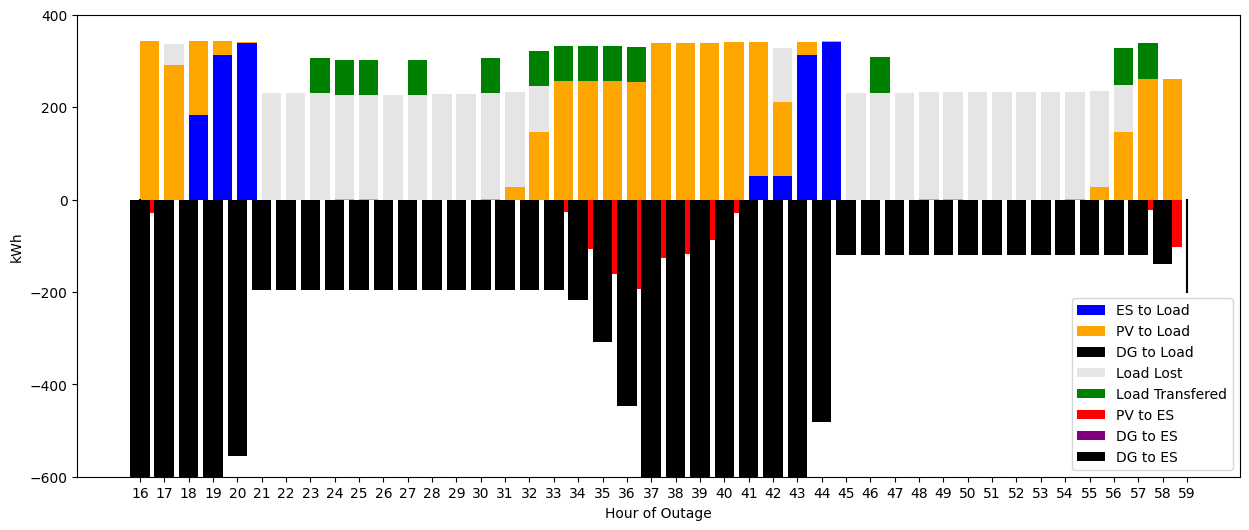

In [55]:
with open(f'{com_folder[com]} Medium_Outage.pkl', 'rb') as handle:
    ESL, PVL, PVES, DGES, DGL, LT, LL, E = pickle.load(handle)
handle.close()
itg = [(1, t, 8) for t in range(16, 16+42+1)]
LT = {(1, t, 8): sum([LT[(1, t, to, 8)] for to in range(16, 16+42+1)]) for t in range(16, 16+42+1)}
rng = range(16, 16+42+1)

figure2 = plt.figure(figsize=(15, 6), dpi=100)
plt.bar(rng, [ESL[i] for i in itg],
        color='blue', align='edge', label='ES to Load')
plt.bar(rng, [PVL[i] for i in itg],
        bottom=[ESL[i] for i in itg], color='orange', align='edge', label='PV to Load')
plt.bar(rng, [DGL[i] for i in itg],
        bottom=np.add([ESL[i] for i in itg], [PVL[i] for i in itg]),
        color='black', align='edge', label='DG to Load')
plt.bar(rng, [LL[i] for i in itg],
        bottom=np.add([ESL[i] for i in itg],[PVL[i] for i in itg]),
        color='gray', alpha=0.2, align='edge', label='Load Lost')
plt.bar(rng, [LT[i] for i in itg],
        bottom=np.array([ESL[i] for i in itg])+np.array([PVL[i] for i in itg])+np.array([LL[i] for i in itg]),
        color='green', align='edge', label='Load Transfered')
plt.bar(rng, -1*np.array([PVES[i] for i in itg]),
        color='red', label='PV to ES', align='edge')
plt.bar(rng, -1*np.array([DGES[i] for i in itg]),
        color='purple', label='DG to ES')
plt.bar(rng, -1*np.array([E[i] for i in itg]),
        color='black', label='DG to ES')

plt.plot([16, 16], [-200, 0], color='black')
plt.plot([16+42+1, 16+42+1], [-200, 0], color='black')
plt.xlabel('Hour of Outage')
plt.xticks(range(16, 16+44))
plt.ylabel('kWh')
plt.ylim([-600, 400])
plt.legend()
plt.savefig(f'../IMG/{com_folder[com]}-MediumOutage.jpg', bbox_inches='tight')

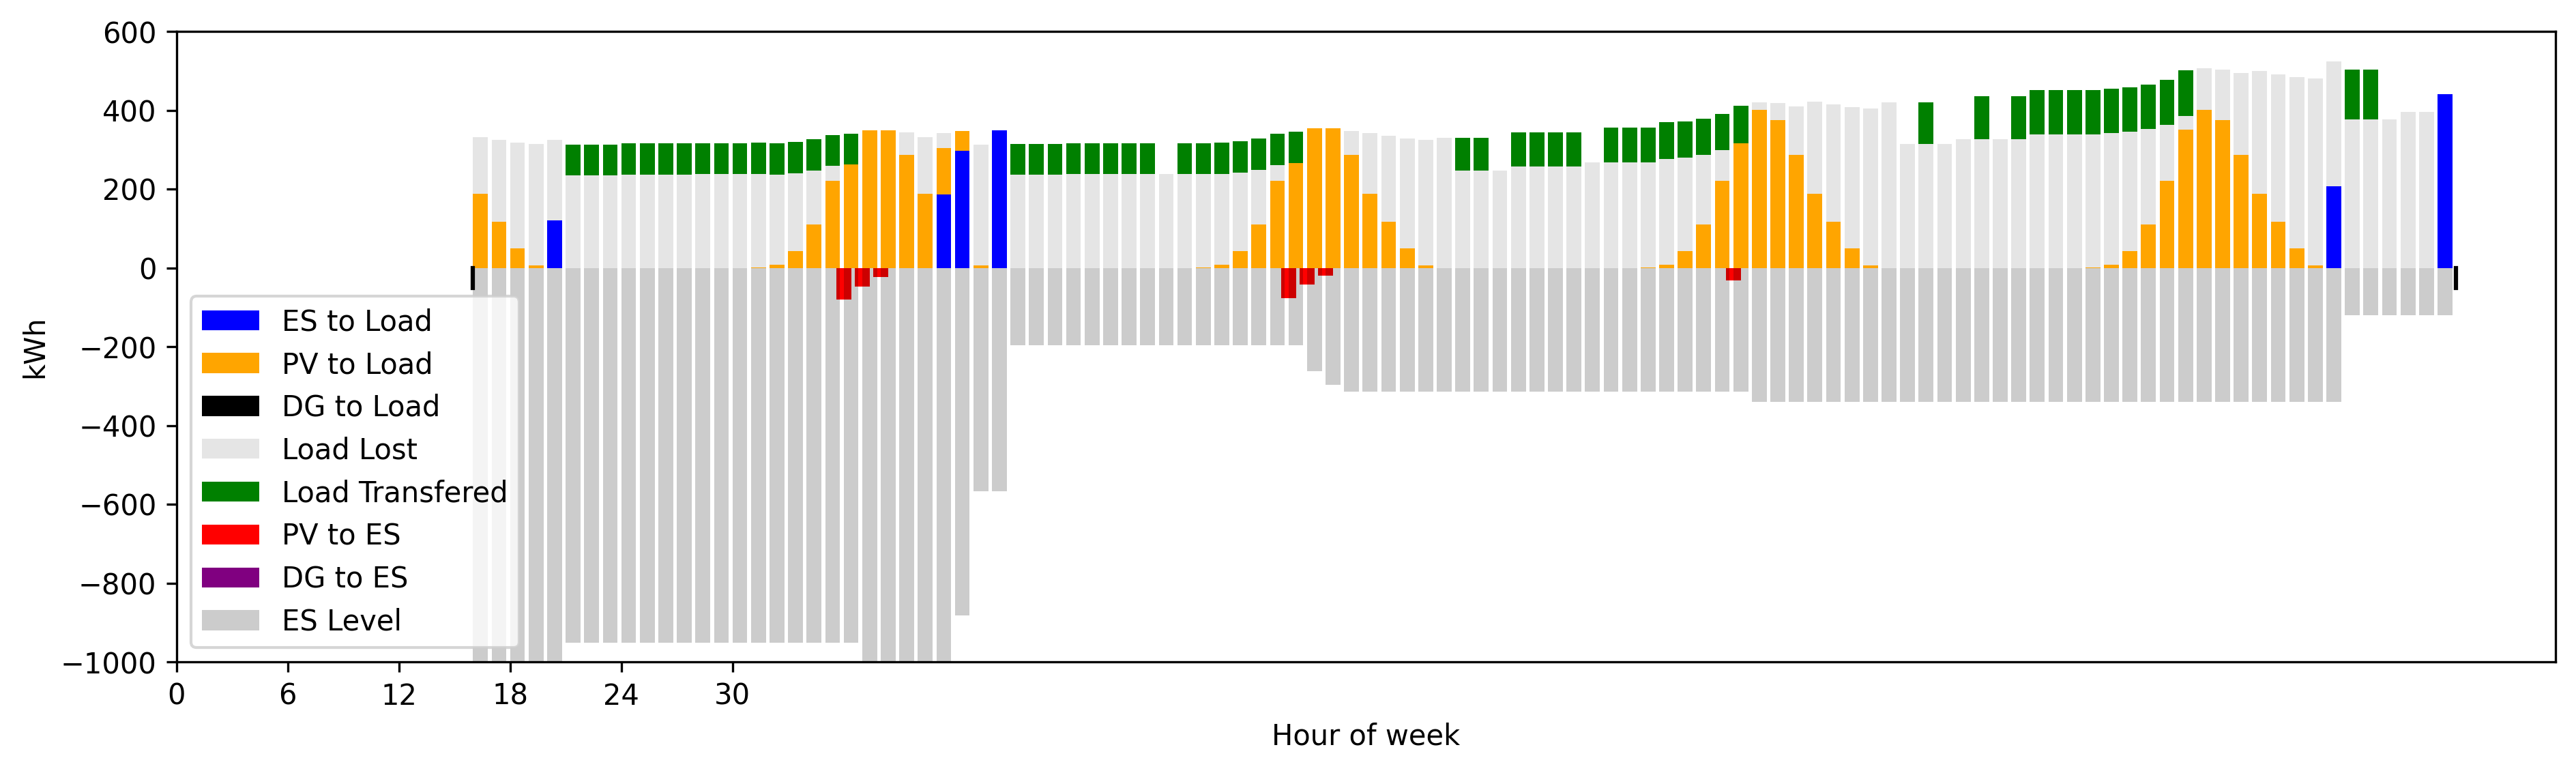

In [63]:
with open(f'{com_folder[com]} High_Outage.pkl', 'rb') as handle:
    ESL, PVL, PVES, DGES, DGL, LT, LL, E = pickle.load(handle)
handle.close()
itg = [(1, t, 8) for t in range(16, 16+106+1)]
LT = {(1, t, 8): sum([LT[(1, t, to, 8)] for to in range(16, 16+106+1)]) for t in range(16, 16+106+1)}
rng = range(16, 16+106+1)

figure3 = plt.figure(figsize=(15, 4), dpi=300)
plt.bar(rng, [ESL[i] for i in itg], color='blue', align='edge', label='ES to Load')
plt.bar(rng, [PVL[i] for i in itg], bottom=[ESL[i] for i in itg], color='orange', align='edge', label='PV to Load')
plt.bar(rng, [DGL[i] for i in itg], bottom=np.add([ESL[i] for i in itg], [PVL[i] for i in itg]), color='black', align='edge', label='DG to Load')
plt.bar(rng, [LL[i] for i in itg],
        bottom=np.add([ESL[i] for i in itg],[PVL[i] for i in itg]),
        color='gray', alpha=0.2, align='edge', label='Load Lost')

plt.bar(rng, [LT[i] for i in itg],
        bottom=np.array([ESL[i] for i in itg])+np.array([PVL[i] for i in itg])+np.array([LL[i] for i in itg]),
        color='green', align='edge', label='Load Transfered')

plt.bar(rng, -1*np.array([PVES[i] for i in itg]),
        color='red', label='PV to ES')
plt.bar(rng, -1*np.array([DGES[i] for i in itg]),
        color='purple', label='DG to ES')
plt.bar(rng, -1*np.array([E[i] for i in itg]),
        color='black', label='ES Level', alpha=0.2, align='edge')

plt.plot([16, 16], [-50, 0], color='black')
plt.plot([16+106+1, 16+106+1], [-50, 0], color='black')
plt.xlabel('Hour of week')
plt.xticks([6*i for i in range(6)])
plt.ylabel('kWh')
plt.ylim([-1000, 600])
plt.legend()
plt.savefig(f'../IMG/{com_folder[com]}-HighOutage.jpg', bbox_inches='tight')